<a href="https://colab.research.google.com/github/LiviaAniely/Aplica-es-do-Processamento-de-Linguagem-Natural/blob/main/LiviaA__Modelagem_de_t%C3%B3picos_com_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelagem de tópicos com LDA

Nesta atividade, o objetivo é explorar como a técnica Latent Dirichlet Allocation (LDA) pode ajudar a descobrir os principais tópicos presentes em um conjunto de notícias da Folha de São Paulo.
O LDA é um modelo estatístico, baseado na ideia de que cada tópico é uma mistura de um conjunto de palavras e que cada documento é uma mistura de um conjunto de tópicos.

Etapas:
- Obtenção e processamento de dados
- Treinamento de um modelo de LDA
- Avaliação do modelo
- Encontrar o melhor valor de quantidade de tópicos



In [ ]:
!pip install pyLDAvis==2.1.2
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97718 sha256=e457b0c03c9813ed7b5058ad11d7c86fb7c373e6c128514f6ec5d787c19e843e
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis
2023-08-30 23:51:22.199069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 23:51:23.899345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-30 23:51:26.570974: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative v

# Implementando o LDA

## Obtenção dos dados



In [ ]:
import pandas as pd
import os

papers = pd.read_csv("https://gist.githubusercontent.com/issilva5/3140e5b330cbcbd65ea4e4c456e5409a/raw/10e35f40faeaf9b160b0a7842566d1c78a8118e5/gistfile1.txt")
papers

,titulo,conteudo,categoria
0,Emissões de CO2 ficam estáveis pelo 3º ano seg...,"O mundo conseguiu, pelo terceiro ano consecuti...",ambiente
1,Geleira na Groenlândia derrete e pode elevar o...,Uma importante geleira no noroeste da Groenlân...,ambiente
2,Abate de lobos que atacam rebanhos gera discus...,"O governo francês autorizou, na semana passada...",ambiente
3,Uma megausina solar em deserto no Marrocos pre...,O micro-ônibus atravessa um enorme planalto em...,ambiente
4,Contando elefantes: pesquisadores fazem maior ...,"Há dois anos, pesquisadores cruzam os céus afr...",ambiente
...,...,...,...
3995,Usuários vão poder remover fotos íntimas das b...,Usuários que tiverem imagens íntimas divulgada...,tec
3996,App de paquera que mostra 'com quem você cruzo...,Encontre as pessoas com quem você cruzou. Essa...,tec
3997,Alexandre Hohagen deixa vice-presidência do Fa...,"O brasileiro Alexandre Hohagen, vice-president...",tec
3998,Campus Party proíbe acampantes de pedir comida...,"Participantes da Campus Party, acampamento de ...",tec


## Processamento dos dados

### Removendo pontuação e colocando em minúscula

In [ ]:
import re

# Remove pontuação
papers['conteudo_processed'] = papers['conteudo'].map(lambda x: re.sub('[,\.!?]', '', x))

# Converter conteúdo para minúsculo
papers['conteudo_processed'] = papers['conteudo_processed'].map(lambda x: x.lower())

papers

,titulo,conteudo,categoria,conteudo_processed
0,Emissões de CO2 ficam estáveis pelo 3º ano seg...,"O mundo conseguiu, pelo terceiro ano consecuti...",ambiente,o mundo conseguiu pelo terceiro ano consecutiv...
1,Geleira na Groenlândia derrete e pode elevar o...,Uma importante geleira no noroeste da Groenlân...,ambiente,uma importante geleira no noroeste da groenlân...
2,Abate de lobos que atacam rebanhos gera discus...,"O governo francês autorizou, na semana passada...",ambiente,o governo francês autorizou na semana passada ...
3,Uma megausina solar em deserto no Marrocos pre...,O micro-ônibus atravessa um enorme planalto em...,ambiente,o micro-ônibus atravessa um enorme planalto em...
4,Contando elefantes: pesquisadores fazem maior ...,"Há dois anos, pesquisadores cruzam os céus afr...",ambiente,há dois anos pesquisadores cruzam os céus afri...
...,...,...,...,...
3995,Usuários vão poder remover fotos íntimas das b...,Usuários que tiverem imagens íntimas divulgada...,tec,usuários que tiverem imagens íntimas divulgada...
3996,App de paquera que mostra 'com quem você cruzo...,Encontre as pessoas com quem você cruzou. Essa...,tec,encontre as pessoas com quem você cruzou essa ...
3997,Alexandre Hohagen deixa vice-presidência do Fa...,"O brasileiro Alexandre Hohagen, vice-president...",tec,o brasileiro alexandre hohagen vice-presidente...
3998,Campus Party proíbe acampantes de pedir comida...,"Participantes da Campus Party, acampamento de ...",tec,participantes da campus party acampamento de t...


### Tokenização


In [ ]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True remove pontuação

data = papers.conteudo_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[3000])

['presidente', 'da', 'camara', 'eduardo', 'cunha', 'pmdb', 'rj', 'afirmou', 'nesta', 'quarta', 'feira', 'que', 'chamada', 'pec', 'da', 'bengala', 'proposta', 'de', 'emenda', 'constituicao', 'que', 'eleva', 'de', 'para', 'anos', 'idade', 'maxima', 'de', 'aposentadoria', 'para', 'magistrados', 'esta', 'em', 'processo', 'de', 'amadurecendo', 'acabara', 'votada', 'peemedebista', 'no', 'entanto', 'nao', 'assegurou', 'que', 'deliberacao', 'da', 'proposta', 'que', 'pode', 'tirar', 'da', 'presidente', 'dilma', 'rousseff', 'chance', 'de', 'nomear', 'cinco', 'novos', 'ministros', 'do', 'supremo', 'tribunal', 'federal', 'ate', 'fim', 'de', 'seu', 'segundo', 'mandato', 'em', 'sera', 'analisada', 'na', 'proxima', 'semana', 'cunha', 'ofereceu', 'um', 'jantar', 'magistrados', 'na', 'noite', 'desta', 'terca', 'feira', 'proposta', 'foi', 'debatida', 'pec', 'da', 'bengala', 'foi', 'debatida', 'com', 'outros', 'pontos', 'ontem', 'ela', 'esta', 'amadurecendo', 'pode', 'acontecer', 'semana', 'que', 'vem', 

### Bigramas, tigramas e stopwords



In [ ]:
# Bigramas e trigramas
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)


bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# NLTK Stop words
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Funções para stopwords, bigramas, trigramas and lemmatização
def remove_stopwords(texts, stop_words):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remover stopwords
data_words_nostops = remove_stopwords(data_words, stop_words)

# Formar bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load("pt_core_news_sm", disable=['parser', 'ner'])

# Lemmatização
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['Mundo', 'conseguir', 'terceiro', 'ano_consecutivo', 'manter', 'estavel', 'emissoes', 'avanco', 'ainda', 'insuficiente', 'acordo', 'informe', 'divulgar', 'nesta_segunda', 'feira', 'conferencia', 'mudanca_climatica', 'cop', 'resultado', 'animador', 'clara', 'inesperar', 'mudanca', 'relacao', 'rapir', 'crescimento', 'emissoes', 'ano', 'decar', 'precedente']


### Criando corpus e dictionary


In [ ]:
import gensim.corpora as corpora

# Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Corpus
texts = data_lemmatized

# TDF
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


## Treinando um modelo LDA


In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)



## Avaliando o modelo

### Avaliação visual de modelos

#### Formação dos tópicos

É possível visualizar as palavras-chave de cada tópico e a sua importância usando o comando lda_model.print_topics().

In [ ]:
from pprint import pprint

pprint(lda_model.print_topics())

[(0,
  '0.023*"palestino" + 0.015*"cartaz" + 0.013*"avenida" + 0.006*"cisjordania" '
  '+ 0.006*"destravar" + 0.006*"colecionador" + 0.006*"visibilidade" + '
  '0.005*"bom_retiro" + 0.005*"espectador" + 0.004*"masp"'),
 (1,
  '0.013*"dizer" + 0.010*"afirmar" + 0.009*"governo" + 0.009*"empresa" + '
  '0.008*"presidente" + 0.007*"poder" + 0.007*"ano" + 0.006*"fazer" + '
  '0.005*"dever" + 0.005*"ainda"'),
 (2,
  '0.023*"sao_paulo" + 0.022*"dia" + 0.013*"banda" + 0.012*"hotel" + '
  '0.010*"regiao_central" + 0.009*"candidato" + 0.008*"paulista" + '
  '0.007*"disputar" + 0.006*"interditar" + 0.006*"sera"'),
 (3,
  '0.003*"formalizar" + 0.000*"xiaomi" + 0.000*"cobrador" + 0.000*"perseu" + '
  '0.000*"abramo" + 0.000*"pt_rui" + 0.000*"figurativo" + '
  '0.000*"Jaques_wagner" + 0.000*"apelidade" + 0.000*"censor"'),
 (4,
  '0.005*"otima" + 0.002*"valerar" + 0.002*"deputados_aprovar" + '
  '0.000*"armazenamento_gbyte" + 0.000*"pixels_pixels" + 0.000*"ghz_quatro" + '
  '0.000*"expansivel" + 0.00

#### Tópico dominante por documento

Nos modelos LDA, cada documento é composto por vários tópicos. No entanto, geralmente apenas um dos tópicos é dominante. O código abaixo extrai esse tópico dominante para cada sentença e exibe o peso do tópico e as palavras-chave em uma saída formatada de maneira organizada.

Dessa forma, você saberá a qual tópico cada documento pertence predominantemente.

In [ ]:
def get_dominant_topic_per_document(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_list = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_list.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]))
            else:
                break

    sent_topics_df = pd.DataFrame(sent_topics_list)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    df_dominant_topic = sent_topics_df.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    return df_dominant_topic


df_dominant_topic = get_dominant_topic_per_document(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6,0.5268,"presidente, dizer, politico, pai, autoridade, ...","[Mundo, conseguir, terceiro, ano_consecutivo, ..."
1,1,5,0.4184,"poder, pesquisa, estudo, pesquisador, saude, p...","[importante, geleira, noroeste, groenlander, d..."
2,2,1,0.2524,"dizer, afirmar, governo, empresa, presidente, ...","[governo, france, autorizar, semana_passada, a..."
3,3,9,0.4467,"fazer, dizer, ano, pessoa, poder, dia, bom, fi...","[micro_onibu, atravessar, enorme, planalto, es..."
4,4,5,0.4241,"poder, pesquisa, estudo, pesquisador, saude, p...","[ha, ano, pesquisador, cruzar, ceu, africano, ..."
...,...,...,...,...,...
3995,3995,9,0.3933,"fazer, dizer, ano, pessoa, poder, dia, bom, fi...","[usuario, imagem, intima, divulgar, autorizaca..."
3996,3996,9,0.6671,"fazer, dizer, ano, pessoa, poder, dia, bom, fi...","[pessoa, cruzar, proposta, aplicativo, happnr,..."
3997,3997,9,0.5075,"fazer, dizer, ano, pessoa, poder, dia, bom, fi...","[brasileiro, vice_presidente, facebook, americ..."
3998,3998,9,0.6390,"fazer, dizer, ano, pessoa, poder, dia, bom, fi...","[participante, acampamento, tecnologia, nonar,..."


#### Top-K documentos mais representativo por tópico

Às vezes, você deseja obter exemplos de frases que representem melhor um determinado tópico. O código a seguir obtém a frase mais exemplar para cada tópico.

In [ ]:
def get_topk_documents_per_topic(df_dominant_topic, k = 1):

    sent_topics_sorteddf_mallet = pd.DataFrame()
    sent_topics_outdf_grpd = df_dominant_topic.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                                grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(k)],
                                                axis=0)

    # Reset Index
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Document_No', 'Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
    return sent_topics_sorteddf_mallet


pd.options.display.max_colwidth = 100
# Show

topk_docs_per_topic = get_topk_documents_per_topic(df_dominant_topic)

topk_docs_per_topic.head(20)

,Document_No,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,1867,0,0.6540,"palestino, cartaz, avenida, cisjordania, destravar, colecionador, visibilidade, bom_retiro, espe...","[nicaragua, volei, volei, sportv, ginastica_artistica, sportv, salto, ornamental, volei, uruguai..."
1,1123,1,0.9915,"dizer, afirmar, governo, empresa, presidente, poder, ano, fazer, dever, ainda","[total, pai, apenas, sancionar, lei, definir, plano, meta, educacao, local, exigir, pne_plano, n..."
2,3026,2,0.8875,"sao_paulo, dia, banda, hotel, regiao_central, candidato, paulista, disputar, interditar, sera","[segundo, terca, quarto, quinta, sexta, sabar, domingo]"
3,670,5,0.7243,"poder, pesquisa, estudo, pesquisador, saude, partida, arquivo, paciente, universidade, postar","[analisar, imagem, arquivo, obter, jipe, curiosity, nasa, pesquisador, estados_unir, dizer, enco..."
4,2760,6,0.7829,"presidente, dizer, politico, pai, autoridade, feira, acordo, grande, lider, estados_unir","[turquia, convocar, feira, embaixador, russiar, pai, apo, ataque, pai, perto, fronteira, sirio, ..."
5,3420,8,0.7342,"empresa, usuario, servico, aplicativo, produto, google, companhia, tecnologia, mercado, aparelho","[rafael_balago, queda, demandar, gerar, crise, rede, comer, estao, apostar, desconto, promocoe, ..."
6,1716,9,0.9791,"fazer, dizer, ano, pessoa, poder, dia, bom, ficar, ver, ha","[ha, ano, viajar, mundo, circuito, profissional, conseguir, ficar, Brasil, menos, gostar, ultimo..."


#### WordCloud para as Top-K palavras chaves mais importantes

Embora você já tenha visto quais são as palavras-chave dos tópicos, uma nuvem de palavras em que o tamanho das palavras é proporcional ao peso é algo visualmente agradável.

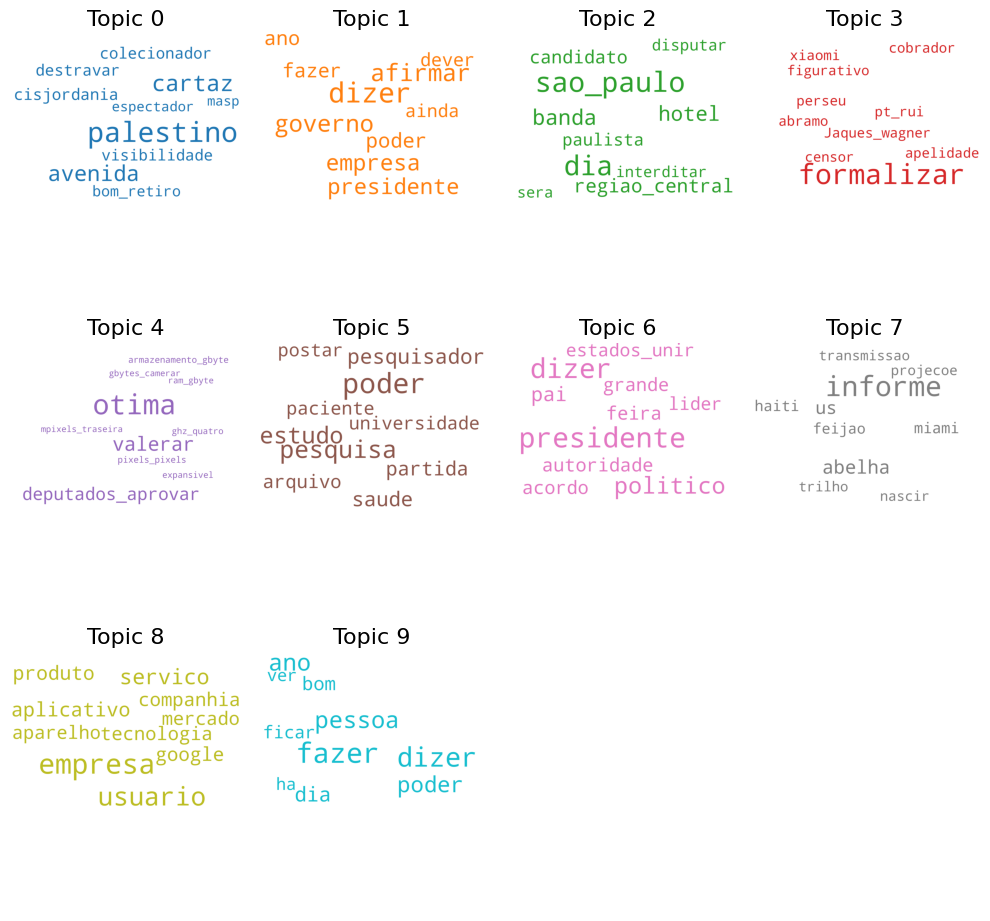

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import math

def get_wordcloud(lda_model, stop_words, max_words = 10):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=max_words,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    n_subplots = int(math.ceil(len(topics)/4))

    fig, axes = plt.subplots(n_subplots, 4, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):

        if i >= len(topics):
          ax.axis('off')
          continue

        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

get_wordcloud(lda_model, stop_words)

#### t-SNE para visualização em 2D

Vamos visualizar os agrupamentos de documentos em um espaço 2D usando o algoritmo t-SNE (t-distributed stochastic neighbor embedding).

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import numpy as np

def tsne_scatter_plot(lda_model):
    # Get topic weights
    topic_weights = []
    for i, row_list in enumerate(lda_model[corpus]):
        topic_weights.append([w for i, w in row_list[0]])

    # Array of topic weights
    arr = pd.DataFrame(topic_weights).fillna(0).values

    # Dominant topic number in each doc
    topic_num = np.argmax(arr, axis=1)

    # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)

    # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = lda_model.num_topics
    mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
    plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
                  width=900, height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    show(plot)

tsne_scatter_plot(lda_model)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 0.159s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.061162
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.260307
[t-SNE] KL divergence after 1000 iterations: 1.007020


#### Usando pyLDAVis

Finalmente, o pyLDAVis é a forma mais comum e interessante de visualizar as informações contidas em um modelo de tópicos. Abaixo está a implementação para LdaModel().

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.277889  0.029405       1        1  39.469872
1     -0.282891  0.084103       2        1  27.165492
6     -0.182202  0.207069       3        1  10.625806
5     -0.035146 -0.110677       4        1   9.974676
8     -0.223208 -0.268795       5        1   9.283922
2      0.136810  0.086688       6        1   2.802566
7      0.219978 -0.009595       7        1   0.355754
0      0.222822 -0.008921       8        1   0.215808
4      0.211058 -0.004695       9        1   0.054538
3      0.210667 -0.004584      10        1   0.051564, topic_info=                    Term         Freq        Total Category  logprob  loglift
467                  dia  3645.000000  3645.000000  Default  30.0000  30.0000
740              empresa  3995.000000  3995.000000  Default  29.0000  29.0000
2028           sao_paulo  1737.000000  1737.000000  Default  28.0000  28.0000
314           presidente  3323.000000  3323.000000  Default  27.0000  27.0000
4650             usuario  1892.000000  1892.000000  Default  26.0000  26.0000
...                  ...          ...          ...      ...      ...      ...
28521                may     0.008868     1.143917  Topic10 -10.8709   2.7103
18980           incluido     0.008867     1.035218  Topic10 -10.8710   2.8101
7739            rodoanel     0.008867     1.000243  Topic10 -10.8710   2.8445
30120         cadeirante     0.008867     1.013330  Topic10 -10.8710   2.8315
48156  audiencia_publica     0.008867     1.009215  Topic10 -10.8710   2.8355

[578 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
11880      5  0.998707       Apple
1059       1  0.285898      Brasil
1059       2  0.239284      Brasil
1059       3  0.321117      Brasil
1059       4  0.022789      Brasil
...      ...       ...         ...
7422       3  0.997811        voto
7635       1  0.997771         voz
50292      5  0.933271      xiaomi
10241      7  0.896694        zika
8730       6  0.987385  zona_oeste

[733 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 7, 6, 9, 3, 8, 1, 5, 4])

## **(Etapa 3) Avaliação do modelo**




### **1. Quais são as top-10 palavras-chaves mais importantes em cada tópico? Na sua opinião, elas têm relação semântica entre si? Caso sim, tente criar rótulos para cada um dos tópicos.**



TÓPICO 1: tópico sem rótulo

fazer, dizer, ano, pessoa, poder, dia, bom, ficar, ver, ha.

TÓPICO 2: "governo"

dizer, afirmar, governo, empresa, presidente, poder, fazer, amo, dever, ainda.

TÓPICO 3: "política"

presidente, dizer, politico, pai, autoridade, grande, acordo, estados_unir, ataque, feira.

TÓPICO 4: "tecnologia"

empresa, usuario, servico, aplicativo, produto, google, companhia, tecnologia, mercado, aparelho.

TÓPICO 5: "ciência"

poder, pesquisa, estudo, pesquisador, partida, saude, universidade, postar, paciente, humano.

TÓPICO 6: "São Paulo"

dia, sao_paulo, banda, hotel, regiao_central, candidato, paulista, disputar, sera, interditar.

TÓPICO 7: tópico sem rótulo

informe, abelha, terremoto, us, miami, haiti, feijao, projecoe, trilho, nascir.

TÓPICO 8: "Oriente Médio"

palestino, cartaz, avenida, cisjordania, destravar, colecionador, visibilidade, bom_retiro, masp, militancia.

TÓPICO 9: tópico sem rótulo

senadora, otima, valerar, deputados_aprovar, excluido, armazenamento_gbyte, pixels_pixels, ghz_quatro, mpixels_traseira, expansivel.

TÓPICO 10: tópico sem rótulo

formalizar, xiaomi, cobrador, abramo, perseu, figurativo,
Jaques_wagner, pt_rui, censor, apelidade.

### **2. Analisando a notícia mais representativa por tópico, você acha que os rótulos que você criou para os tópicos fazem sentido? Utilize alguma das notícias como exemplo para validar sua afirmação.**

Analisando as notícias representativas dos tópicos e os rótulos criados na questão acima, chega-se à conclusão que os rótulos não tem tanto a ver com essas notícias, considerando que os rótulos se basearam apenas nas palavras mais frequentes, com exceção do tópico 6.

Com relação ao tópico 1, a notícia mais representativa é a 1123. O tópico não tem rótulo adequado, e o conteúdo da notícia trata de temática relacionada à governo.

Com relação ao tópico 2, a notícia mais representativa é a 1002. O tópico tem rótulo "governo", e o conteúdo tem relação com abertura de um vestibular.

Com relação ao tópico 5, a notícia mais representativa é a 135. O tópico tem rótulo "ciência", e o conteúdo tem relação uma pesquisa sobre peixes.

Com relação ao tópico 6, a notícia mais representativa é a 1802. O tópico tem rótulo "São Paulo", e o conteúdo tem relação com um jogo de futebol.

Com relação ao tópico 8, a notícia mais representativa é a 3420. O tópico tem rótulo "Oriente Médio", e o conteúdo tem relação com comida em São Paulo.

Com relação ao tópico 9, a notícia mais representativa é a 1002. O tópico não tem rótulo, e o conteúdo tem relação com arte.

Os tópicos 3, 4, 7 e 10 não têm notícias representativas.


#### Códigos da questão 2


In [ ]:
topk_docs_per_topic


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,1867,0,0.6540,"palestino, cartaz, avenida, cisjordania, destravar, colecionador, visibilidade, bom_retiro, espe...","[nicaragua, volei, volei, sportv, ginastica_artistica, sportv, salto, ornamental, volei, uruguai..."
1,1123,1,0.9915,"dizer, afirmar, governo, empresa, presidente, poder, ano, fazer, dever, ainda","[total, pai, apenas, sancionar, lei, definir, plano, meta, educacao, local, exigir, pne_plano, n..."
2,3026,2,0.8875,"sao_paulo, dia, banda, hotel, regiao_central, candidato, paulista, disputar, interditar, sera","[segundo, terca, quarto, quinta, sexta, sabar, domingo]"
3,670,5,0.7243,"poder, pesquisa, estudo, pesquisador, saude, partida, arquivo, paciente, universidade, postar","[analisar, imagem, arquivo, obter, jipe, curiosity, nasa, pesquisador, estados_unir, dizer, enco..."
4,2760,6,0.7829,"presidente, dizer, politico, pai, autoridade, feira, acordo, grande, lider, estados_unir","[turquia, convocar, feira, embaixador, russiar, pai, apo, ataque, pai, perto, fronteira, sirio, ..."
5,3420,8,0.7342,"empresa, usuario, servico, aplicativo, produto, google, companhia, tecnologia, mercado, aparelho","[rafael_balago, queda, demandar, gerar, crise, rede, comer, estao, apostar, desconto, promocoe, ..."
6,1716,9,0.9791,"fazer, dizer, ano, pessoa, poder, dia, bom, ficar, ver, ha","[ha, ano, viajar, mundo, circuito, profissional, conseguir, ficar, Brasil, menos, gostar, ultimo..."


In [ ]:
#papers.iloc[1123]
#papers.iloc[1003]
#papers.iloc[135]['conteudo']
#papers.iloc[1802]['conteudo']
#papers.iloc[3420]['titulo']
papers.iloc[3270]['conteudo']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'DE SÃO PAULO  O QUE AFETA SUA VIDA  *  TEMPO  *  CULTURA E LAZER  PERSONAGEM DO DIA  Kamila Benevides, 31, estudante de cinema, Perdizes  Precisamos rever muitas coisas. Conseguir enxergar coisas novas e boas que ajudem outras pessoas. Quanto mais pessoas felizes, melhor será o mundo. Aproveite para mudar, sempre dá tempo de se tornar alguém mais humano.    *  AMANHÃ  As dicas do dia seguinte são publicadas aqui sempre às 20h  Coordenação: Wesley Klimpel Reportagem: Tatiana Babadobulos (cidades e agenda) e Paulo Troya + Renan Teles (personagem do dia)'

### **3. Qual sua opinião sobre a quantidade de tópicos que foi usada na modelagem? Você acha que a escolha dessa quantidade foi boa? Tente justificar sua resposta usando exemplos, por exemplo, presença de tópicos muito parecidos.**

Não, porque vários deles têm uma grande intersecção entre si, isso pode ser observado com a projeção pyLDAVIs.
Entre os tópicos 1 e 2, a intersecção é bem grande.
Nos tópicos 7,8 9 e 10, nota-se a proximidade gigante entre eles, tanto que o 8 está contido em 7 e o 10 e 9 se sobrepõem.

### **4. Utilizando a métrica de coerência geral e por tópico, faça a sua interpretação dos resultados dos tópicos extraídos.**

A coerência geral resultou em 0.4596733336666377 e as coerências de cada tópico podem ser observadas no resultado do código abaixo.
Observamos então que os valores das coerências são bastante variados, e a maioria tem uma distância considerável do valor de coerência geral.
No geral, a coerência pode ser considerada baixa na maioria dos tópicos, e podemos destacar o tópico 5 como o de maior coerência.


#### Código para a questão 4

##### Coerência (*Topic Coherence*)


In [ ]:
from gensim.models import CoherenceModel

# Coerência geral
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() # A função get_coherence_per_topic pode ser usada para obter a coerência por tópico
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score:  0.45486226809717145


In [ ]:
#Coerência por tópico
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()

for topic, score in enumerate(coherence_per_topic):
  print(f"Tópico {topic+1} - Coherence Score: {score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tópico 1 - Coherence Score: 0.6025740416471201
Tópico 2 - Coherence Score: 0.3436899446360988
Tópico 3 - Coherence Score: 0.2818212492364607
Tópico 4 - Coherence Score: 0.3120003664982908
Tópico 5 - Coherence Score: 0.7848325615270065
Tópico 6 - Coherence Score: 0.37354001439031315
Tópico 7 - Coherence Score: 0.38384635133997597
Tópico 8 - Coherence Score: 0.5634857035157632
Tópico 9 - Coherence Score: 0.6198714400576719
Tópico 10 - Coherence Score: 0.28296100812301406


## **(Extra) Etapa 4 - Encontrando o melhor valor da quantidade de tópicos**
**Faça uma busca variando o valor da quantidade de tópicos e considerando a coerência média do modelo, argumente sobre se o valor inicial utilizado (10 tópicos), foi uma boa escolha ou não. Caso não, qual seria uma escolha melhor?**

Observando o gráfico gerado pelos treinamentos abaixo com vários valores n de tópicos, o que obteve maior coerência foi o de 18, assim, 18 pode ser uma melhor escolha que 10.

### Encontrando o melhor número de tópicos

Minha abordagem para encontrar o número ótimo de tópicos é construir vários modelos LDA com diferentes valores para o número de tópicos (k) e escolher aquele que proporciona o maior valor de coerência.

Escolher um 'k' que marque o fim de um rápido crescimento da coerência dos tópicos geralmente oferece tópicos significativos e interpretáveis (regra do cotovelo). Escolher um valor ainda maior às vezes pode fornecer sub-tópicos mais granulares.

Se você perceber as mesmas palavras-chave sendo repetidas em vários tópicos, provavelmente é um sinal de que o valor de 'k' é muito grande.

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'Training for n = {num_topics}')
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)

Training for n = 2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training for n = 4
Training for n = 6
Training for n = 8
Training for n = 10
Training for n = 12
Training for n = 14
Training for n = 16
Training for n = 18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


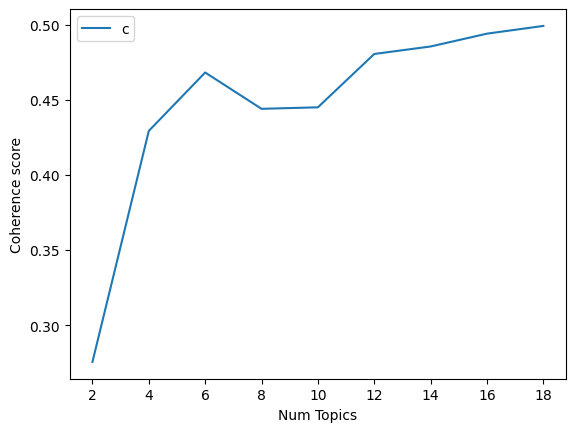

In [ ]:
# Show graph
limit=20; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()